In [2]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import re as re                                  # regex 
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import autocorrelation_plot

init_notebook_mode(connected=True)

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [8]:
cpu = pd.read_csv('./Datasets/cpu.csv', parse_dates = [0], index_col = 0)

def normalize(a):
    
    return (a-a.std())/a.mean()
cpu = normalize(cpu)
cpu.head()

,Value %
Time,
2018-10-02 14:00:00,0.940240
2018-10-02 14:05:00,0.955804
2018-10-02 14:10:00,0.943148
2018-10-02 14:15:00,0.885306
2018-10-02 14:20:00,0.891049


In [9]:
load = pd.read_csv('./Datasets/load.csv', parse_dates = [0], index_col = 0)

def normalize(a):
    
    return (a-a.std())/a.mean()
load = normalize(load)
load.head()

,Load %
Time,
2018-10-02 14:00:00,0.695653
2018-10-02 14:05:00,0.639641
2018-10-02 14:10:00,0.578383
2018-10-02 14:15:00,0.597998
2018-10-02 14:20:00,0.765512


In [10]:
memory = pd.read_csv('./Datasets/memory_usage.csv', parse_dates = [0], index_col = 0)

def normalize(a):
    
    return (a-a.std())/a.mean()
memory = normalize(memory)
memory.head()

,Value bytes
Time,
2018-10-02 14:00:00,1.204703
2018-10-02 14:05:00,1.174140
2018-10-02 14:10:00,1.169530
2018-10-02 14:15:00,1.177568
2018-10-02 14:20:00,1.248037


In [11]:
concatanated = cpu.join(load, how='outer').join(memory, how='outer').fillna(0)
concatanated.head()

,Value %,Load %,Value bytes
Time,,,
2018-10-02 14:00:00,0.940240,0.695653,1.204703
2018-10-02 14:05:00,0.955804,0.639641,1.174140
2018-10-02 14:10:00,0.943148,0.578383,1.169530
2018-10-02 14:15:00,0.885306,0.597998,1.177568
2018-10-02 14:20:00,0.891049,0.765512,1.248037


In [12]:
concatanated.to_csv('concatanated.csv')

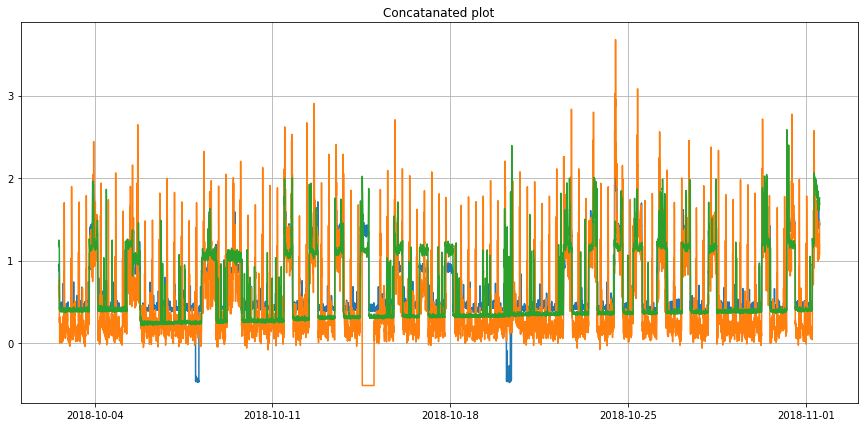

In [13]:
new_df = concatanated['2018-10-02':'2018-11-1']
new_df
plt.figure(figsize=(15, 7))
plt.plot(new_df)
plt.title('Concatanated plot')
plt.grid(True)
plt.show()

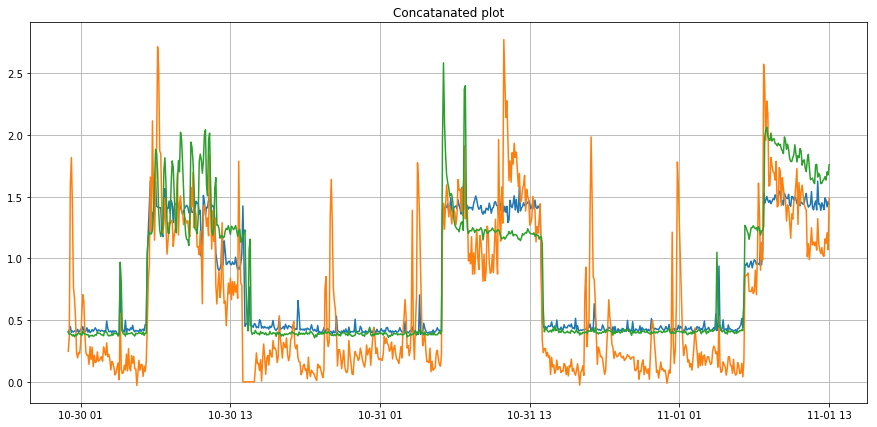

In [14]:
new_df = concatanated['2018-10-30':'2018-11-1']
new_df
plt.figure(figsize=(15, 7))
plt.plot(new_df)
plt.title('Concatanated plot')
plt.grid(True)
plt.show()

                      Value %    Load %  Value bytes
Time                                                
2018-10-02 14:00:00  0.940240  0.695653     1.204703
2018-10-02 14:05:00  0.955804  0.639641     1.174140
2018-10-02 14:10:00  0.943148  0.578383     1.169530
2018-10-02 14:15:00  0.885306  0.597998     1.177568
2018-10-02 14:20:00  0.891049  0.765512     1.248037


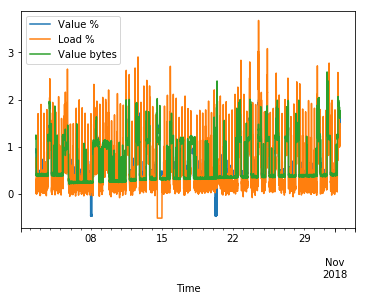

In [16]:
print(concatanated.head())
concatanated.plot()
plt.show()

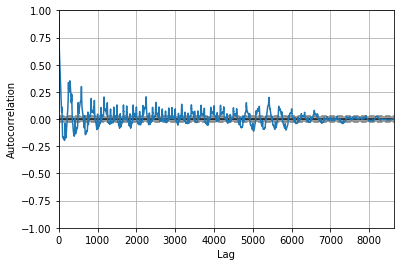

In [18]:
autocorrelation_plot(concatanated)
plt.show()

Test RMSE: 0.008


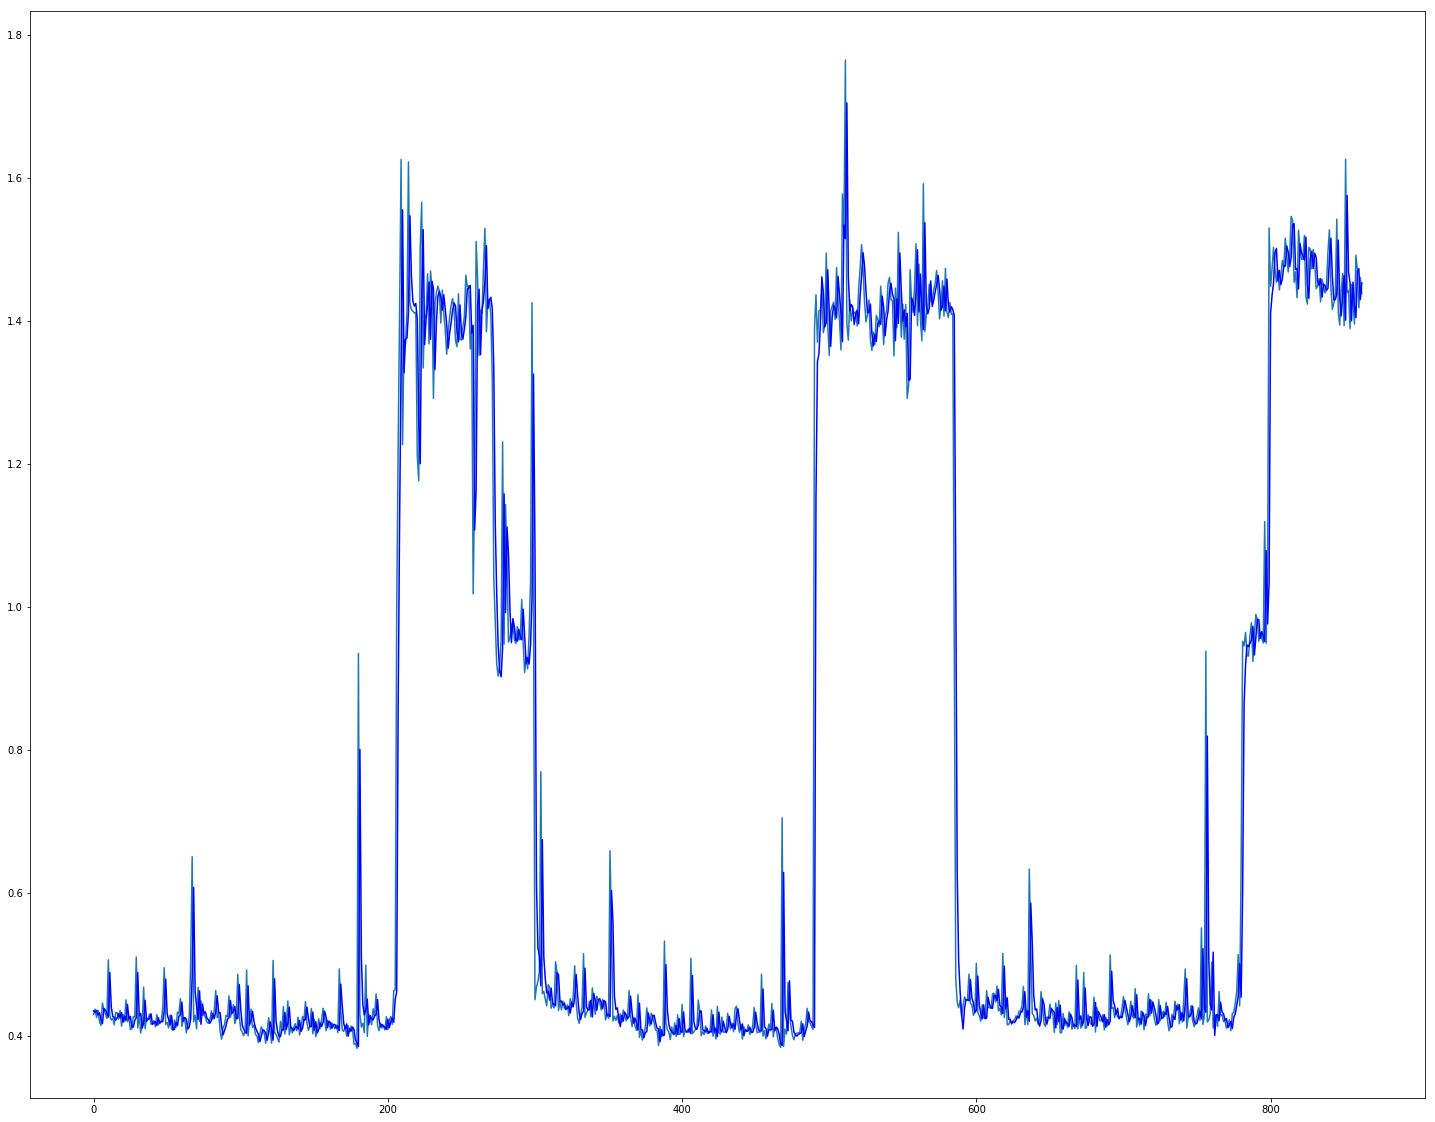

In [20]:
new_df = concatanated['2018-10-02':'2018-11-1']
X = new_df['Value %']
X = X.values
# X = concatanated.values('Value%')
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % error)
# plot
plt.figure(figsize=(25,20))
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()

Test RMSE: 0.054


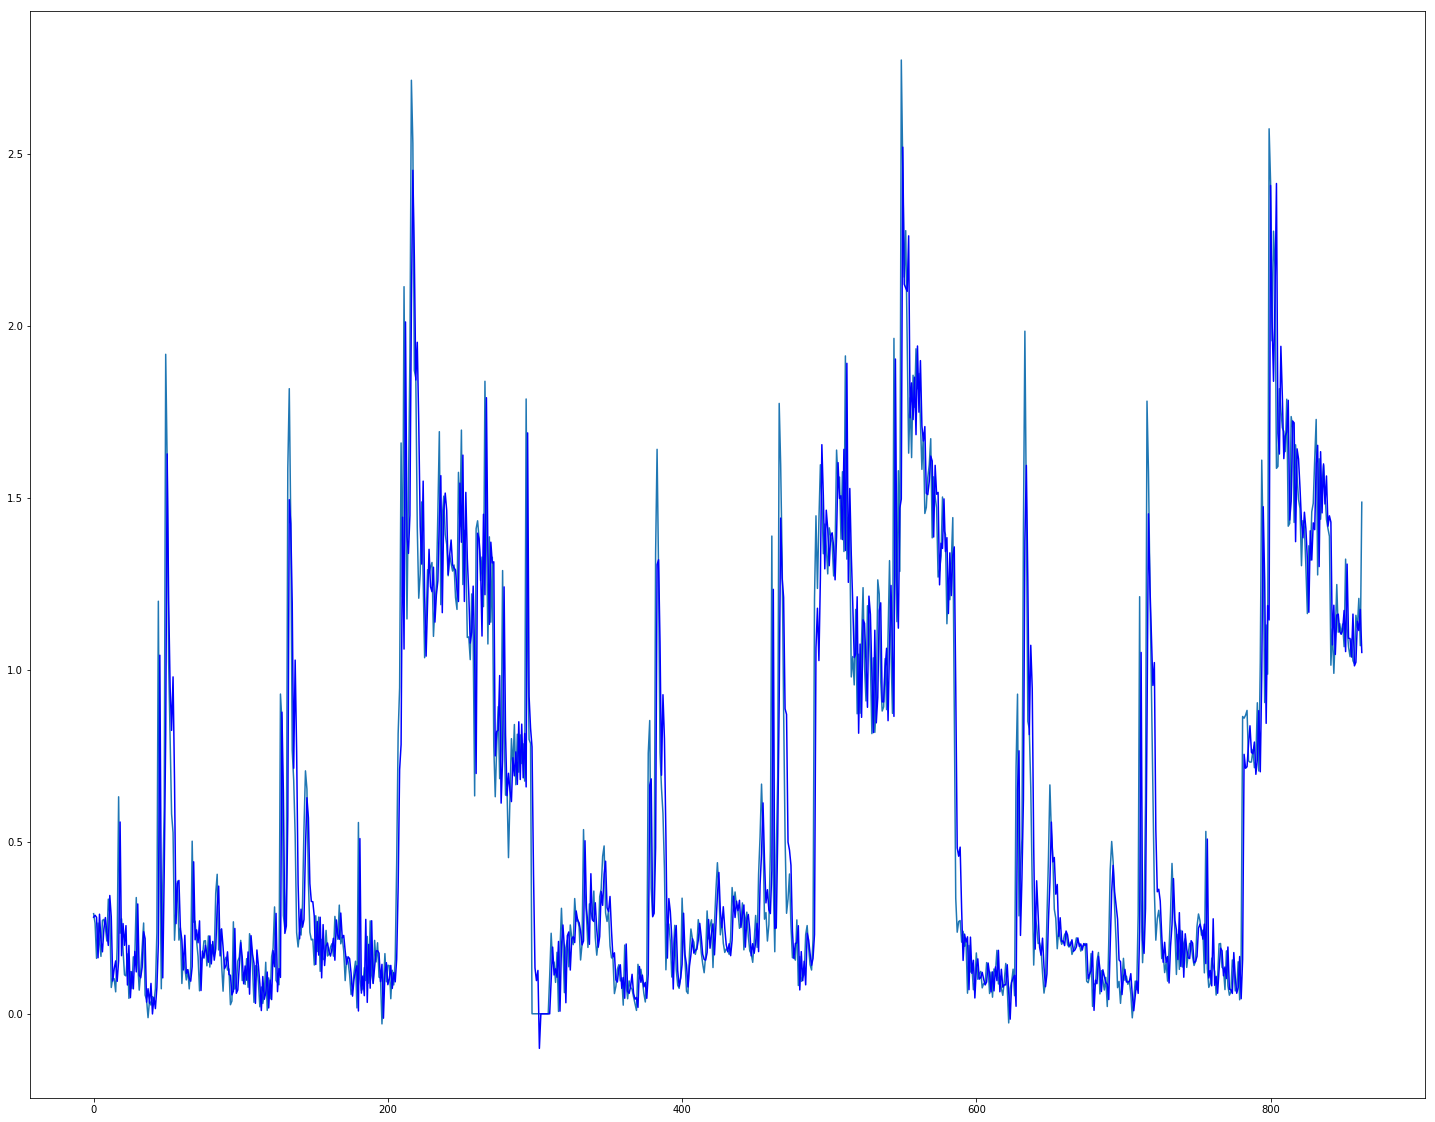

In [21]:
new_df = concatanated['2018-10-02':'2018-11-1']
X = new_df['Load %']
X = X.values
# X = concatanated.values('Value%')
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % error)
# plot
plt.figure(figsize=(25,20))
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()

Test RMSE: 0.013


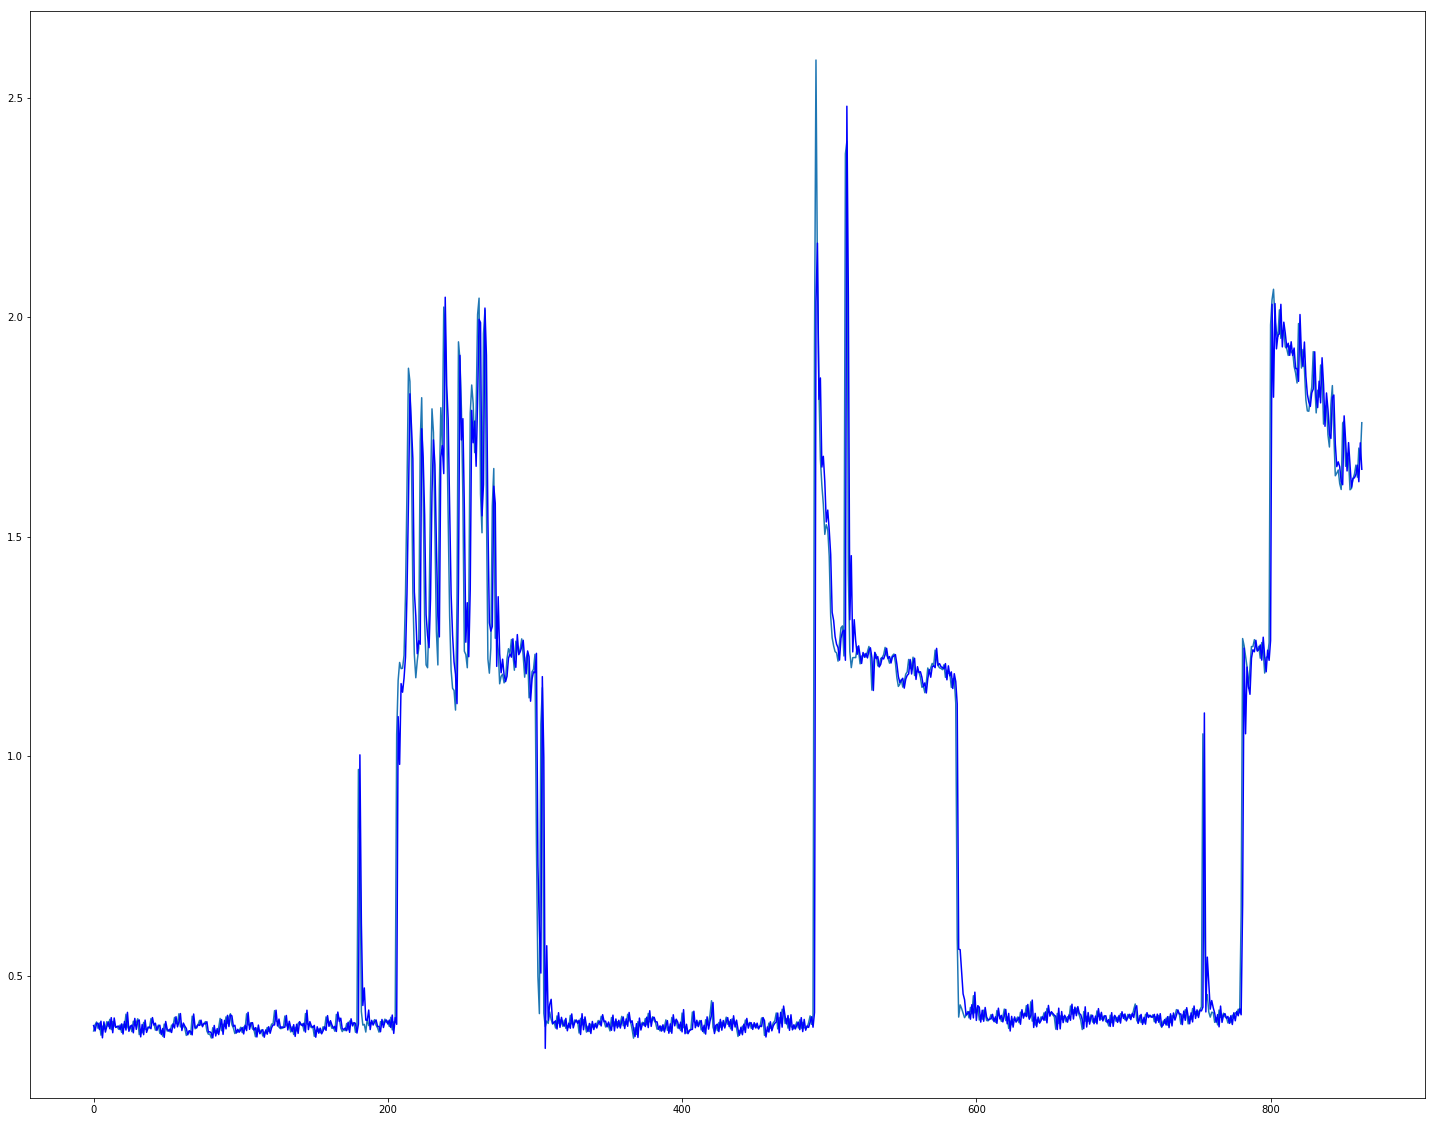

In [22]:
new_df = concatanated['2018-10-02':'2018-11-1']
X = new_df['Value bytes']
X = X.values
# X = concatanated.values('Value%')
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % error)
# plot
plt.figure(figsize=(25,20))
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()